# AI LAB 2024

## Introduction

## Materials and Methods

## Libraries

In [1]:
# Check for libraries that are needed
!pip install pandas
!pip install numpy==1.19.5
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

------------------------------------------------------------------------

------------------------------------------------------------------------

## EDA (Exploratory Data Analysis)
Now we start by loading the 4 dataset.
Each of them is from a single experiment, and each experiment is different because of the sequencing technique for the cells' RNA, and of the cells' environment.

### Metadata files
We start with the metadata files, one for each experiment. They are TSV files

In [3]:
df_metaM_path = '../ai_lab/SmartSeq/MCF7_SmartS_MetaData.tsv'
df_metaM = pd.read_csv(df_metaM_path, delimiter='\t')
print("Dataframe dimensions:", df_metaM.shape)
print("Dataframe columns:", df_metaM.columns)

Dataframe dimensions: (383, 9)
Dataframe columns: Index(['Filename', 'Cell Line', 'Lane', 'Pos', 'Condition', 'Hours',
       'Cell name', 'PreprocessingTag', 'ProcessingComments'],
      dtype='object')


In [4]:
#we drop the first column 'Filename' as it is not needed

df_metaM = df_metaM.drop(columns=['Filename'])
df_metaM.head()

,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
0,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
1,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
2,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
3,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
4,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


In [5]:
df_metaH_path = '../ai_lab/SmartSeq/HCC1806_SmartS_MetaData.tsv'
df_metaH = pd.read_csv(df_metaH_path, delimiter='\t')
print("Dataframe dimensions:", df_metaH.shape)
print("Dataframe columns:", df_metaH.columns)

Dataframe dimensions: (243, 9)
Dataframe columns: Index(['Filename', 'Cell Line', 'PCR Plate', 'Pos', 'Condition', 'Hours',
       'Cell name', 'PreprocessingTag', 'ProcessingComments'],
      dtype='object')


In [6]:
df_metaH.head()

,Filename,Cell Line,PCR Plate,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
0,output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...,HCC1806,1,A10,Normo,24,S123,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
1,output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....,HCC1806,1,A12,Normo,24,S26,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
2,output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...,HCC1806,1,A1,Hypo,24,S97,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
3,output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...,HCC1806,1,A2,Hypo,24,S104,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
4,output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...,HCC1806,1,A3,Hypo,24,S4,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


## What is the dataset made of?

For every row, we have a single observation from an experiment, and of course in the columns we have the collected data of the experiment. In order:
#### 1.  Cell Line 
  Content

#### 2. Lane
  Content

#### 3. Pos
  Content

#### 4. Condition
  Content

#### 5. Hours
  Content

#### 6. Cell Name
  Content

#### 7. Preprocessing Tag
  Content
  
#### 8. ProcessingComments
  Content


## Sequencing data

Now we go to sequencing data, and we notice that they are space-delimited.
Here we just create the path and the dataset on Python.
 


In [7]:
#We just create the path and the dataset on Python
df_seq_pathHFilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Data.txt'

df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathHUnfilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt'

df_seq_pathMFilt = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Data.txt'

df_seq_pathMFiltNorm = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathMUnfilt = '../ai_lab/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt'

df_seq_HFilt = pd.read_csv(df_seq_pathHFilt, delimiter=' ')

df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')

df_seq_HUnfilt = pd.read_csv(df_seq_pathHUnfilt, delimiter=' ')

df_seq_MFilt = pd.read_csv(df_seq_pathMFilt, delimiter=' ')

df_seq_MFiltNorm = pd.read_csv(df_seq_pathMFiltNorm, delimiter=' ')

df_seq_MUnfilt = pd.read_csv(df_seq_pathMUnfilt, delimiter=' ')

There are six dataset, and we can understand what they actually are based on their name, for the EDA part we focus on the Unfiltered datased but then we will use Filtered and Normalised one for supervised/uns ML.

#### 1. SmartSeq\HCC1806_SmartS_Unfiltered_Data.txt
  The cell line is HCC1806, the technology is SmartS, and this dataset contains the Unfiltered data

#### 2. SmartSeq\MCF7_SmartS_Unfiltered_Data.txt
  The cell line is MCF7, the technology is SmartS, and this dataset contains the Unfiltered data



We analyze one dataset at a time.

#### 1. SmartSeq\HCC1806_SmartS_Unfiltered_Data.txt

In [8]:
# Exploring the dataframe for the unfiltered data
print("Dataframe dimension:", df_seq_HUnfilt.shape)
print("First Column:", df_seq_HUnfilt.iloc[:,0])
print("Columns list:", list(df_seq_HUnfilt.columns))
# Hence we see features on the rows and therefore we need to transpose the data matrix

Dataframe dimension: (23396, 243)
First Column: WASH7P         0
CICP27         0
DDX11L17       0
WASH9P         0
OR4F29         2
            ... 
MT-TE         22
MT-CYB      4208
MT-TT         26
MT-TP         66
MAFIP          0
Name: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam, Length: 23396, dtype: int64
Columns list: ['output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam', 'output.STAR.PCRPl

In [9]:
# Check for the types of data in the dataframe
print("Data types in the dataframe:", df_seq_HUnfilt.dtypes)
# Check for features
gene_symbols = df_seq_HUnfilt.index
print("Gene symbols in the dataframe:",gene_symbols)

Data types in the dataframe: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       int64
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        int64
                                                                        ...  
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     int64
Length: 243, dtype: object
Gene symbols in the dataframe: Index(['WASH7P', 'CICP27', 'DDX11L17', 'WASH9P', 'OR4F2

In [10]:
# Take the transpose of the dataframe
print("Dataframe dimension before transpose:", df_seq_HUnfilt.shape)
df_seq_HUnfilt = df_seq_HUnfilt.T
print("Dataframe dimension after transpose:", df_seq_HUnfilt.shape)
df_seq_HUnfilt.head(5)


Dataframe dimension before transpose: (23396, 243)
Dataframe dimension after transpose: (243, 23396)


,WASH7P,CICP27,DDX11L17,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,0,0,0,0,2,250,54,1740,6,1,...,17,5,15,3852,900,22,4208,26,66,0
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,0,0,0,0,0,424,100,2340,5,1,...,49,29,36,7457,1439,43,6491,62,71,4
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,0,0,0,0,0,11,0,22,0,0,...,0,0,0,93,12,0,25,0,1,0
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,0,0,0,0,0,63,16,1020,3,0,...,43,17,8,1479,234,0,4819,11,3,7
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,0,0,0,0,0,27,3,303,0,0,...,0,0,3,303,33,0,310,4,9,0


In [11]:
# Now we look at evetual missing values in the dataframe
print("Missing values in the dataframe by columns:", df_seq_HUnfilt.isnull().sum())
print("Missing values in the whole dataframe:", df_seq_HUnfilt.isna().sum().sum())

Missing values in the dataframe by columns: WASH7P      0
CICP27      0
DDX11L17    0
WASH9P      0
OR4F29      0
           ..
MT-TE       0
MT-CYB      0
MT-TT       0
MT-TP       0
MAFIP       0
Length: 23396, dtype: int64
Missing values in the whole dataframe: 0


In [12]:
df_seq_HUnfilt.describe()

,WASH7P,CICP27,DDX11L17,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,...,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.045267,0.119342,0.469136,0.255144,0.127572,117.930041,28.427984,904.308642,1.403292,0.378601,...,10.358025,5.930041,13.493827,2290.213992,386.901235,18.246914,2163.588477,20.613169,46.444444,3.897119
std,0.318195,0.594531,1.455282,0.818639,0.440910,103.038022,26.062662,654.520308,1.735003,0.747361,...,10.910199,7.040559,11.803967,1726.423259,309.276105,54.076514,1730.393947,22.224590,47.684223,4.736193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,46.500000,8.000000,390.500000,0.000000,0.000000,...,2.000000,1.000000,4.000000,918.000000,138.500000,4.000000,947.500000,5.000000,14.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,22.000000,790.000000,1.000000,0.000000,...,7.000000,4.000000,10.000000,1848.000000,320.000000,11.000000,1774.000000,14.000000,38.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,42.000000,1208.000000,2.000000,1.000000,...,14.000000,7.500000,20.000000,3172.000000,528.000000,20.000000,2927.000000,30.500000,64.500000,6.000000
max,3.000000,5.000000,12.000000,6.000000,4.000000,694.000000,120.000000,3569.000000,12.000000,4.000000,...,52.000000,43.000000,57.000000,8972.000000,1439.000000,804.000000,11383.000000,154.000000,409.000000,24.000000


In [13]:
# Now we want to add the target column (i.e. the class) to the dataframe, we get the condition from metadata
print(df_metaH.columns)
df_metaH.set_index('Filename', inplace=True)
# Merge the two dataframes with key 'Filename'
merged_df = pd.merge(df_seq_HUnfilt, df_metaH['Condition'], left_index=True, right_index=True)
print(merged_df.columns)

Index(['Filename', 'Cell Line', 'PCR Plate', 'Pos', 'Condition', 'Hours',
       'Cell name', 'PreprocessingTag', 'ProcessingComments'],
      dtype='object')
Index(['WASH7P', 'CICP27', 'DDX11L17', 'WASH9P', 'OR4F29', 'MTND1P23',
       'MTND2P28', 'MTCO1P12', 'MTCO2P12', 'MTATP8P1',
       ...
       'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE', 'MT-CYB', 'MT-TT',
       'MT-TP', 'MAFIP', 'Condition'],
      dtype='object', length=23397)


In [14]:
# Now transform the categorical variable 'Condition' to numerical
dummy_variables = pd.get_dummies(merged_df['Condition'], prefix='category').astype('int')
merged = pd.concat([merged_df, dummy_variables], axis=1)
print(merged.head())
merged.drop(columns=['category_Hypo', 'Condition'], inplace=True)
merged.rename(columns={'category_Normo': 'Target'}, inplace=True)
# Note that 1 = Hypo, 0 = Norm

                                                    WASH7P  CICP27  DDX11L17  \
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....       0       0         0   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...       0       0         0   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...       0       0         0   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...       0       0         0   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...       0       0         0   

                                                    WASH9P  OR4F29  MTND1P23  \
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....       0       2       250   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...       0       0       424   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...       0       0        11   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...       0       0        63   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...       0       0        27   

                                      

In [15]:
merged.head()

,WASH7P,CICP27,DDX11L17,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,...,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP,Target
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,0,0,0,0,2,250,54,1740,6,1,...,5,15,3852,900,22,4208,26,66,0,1
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,0,0,0,0,0,424,100,2340,5,1,...,29,36,7457,1439,43,6491,62,71,4,1
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,0,0,0,0,0,11,0,22,0,0,...,0,0,93,12,0,25,0,1,0,0
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,0,0,0,0,0,63,16,1020,3,0,...,17,8,1479,234,0,4819,11,3,7,0
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,0,0,0,0,0,27,3,303,0,0,...,0,3,303,33,0,310,4,9,0,0


We now look for:
1. Duplicates
2. Sparsity
3. NaNs
4. Outliers
5. Distributions
6. Correlation
7. Normalization

In [16]:
# Check for duplicates
print("Number of duplicates in the dataframe:", merged.duplicated().sum())

Number of duplicates in the dataframe: 0


In [17]:
# Check for sparsity
total_elements = merged.shape[0] * merged.shape[1]
print("Total number of elements in the DataFrame:", total_elements)
missing_values = (merged == 0).sum().sum()
print("Total number of missing values in the DataFrame:", missing_values)
# Calculate the sparsity as the percentage of missing values
sparsity = (missing_values / total_elements) * 100
print("Sparsity of the DataFrame: {:.2f}%".format(sparsity))

Total number of elements in the DataFrame: 5685471
Total number of missing values in the DataFrame: 3175077
Sparsity of the DataFrame: 55.85%


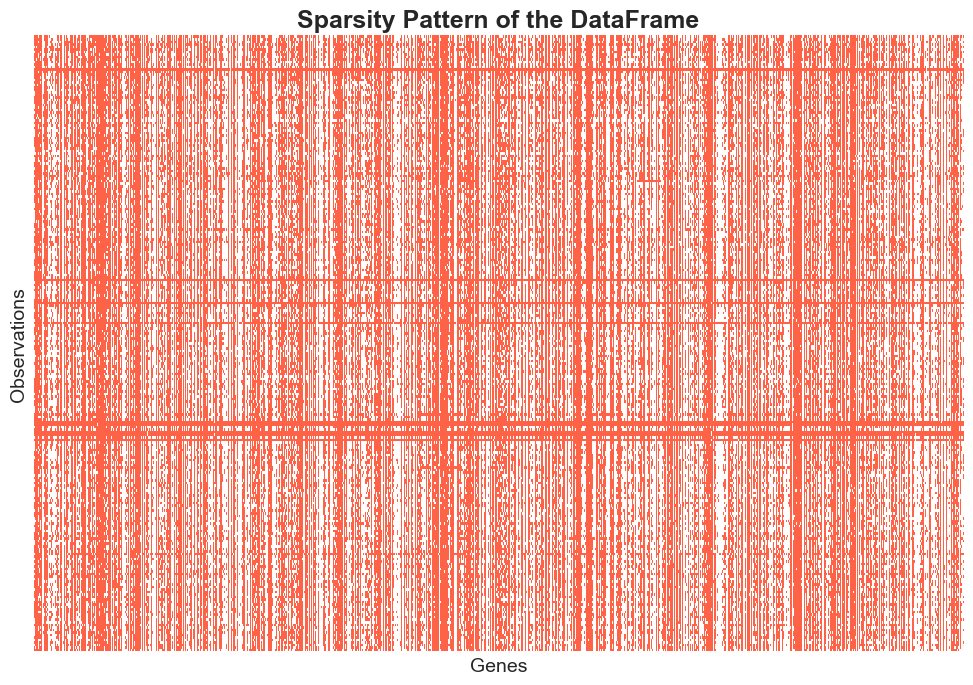

In [29]:
# Visualization of sparsity
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged is your DataFrame

# Create a binary DataFrame indicating missing values (1 for missing, 0 for not missing)
missing_mask = merged == 0

# Set up a custom color palette
colors = ["#FFFFFF", "#FF6347"]  # White for non-missing, red for missing

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_mask, cmap=sns.color_palette(colors), cbar=False, xticklabels=False, yticklabels=False)

# Add title and labels with custom font size and style
plt.title('Sparsity Pattern of the DataFrame', fontsize=18, fontweight='bold')
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Observations', fontsize=14)



# Remove the spines (borders) of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


In [18]:
# Check for NaN values
print("Number of NaN values in the DataFrame:", merged.isna().sum().sum())

Number of NaN values in the DataFrame: 0


for outliers: first we do boxplot : it doesnt work because otherwise you remove too many rows
then inter-quantile range prox rule: it works(?)
z score we don t do it because not norm distr
edo's one with normalization


c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Giuseppe Iannone\anaconda3\lib\site-packages\seaborn\

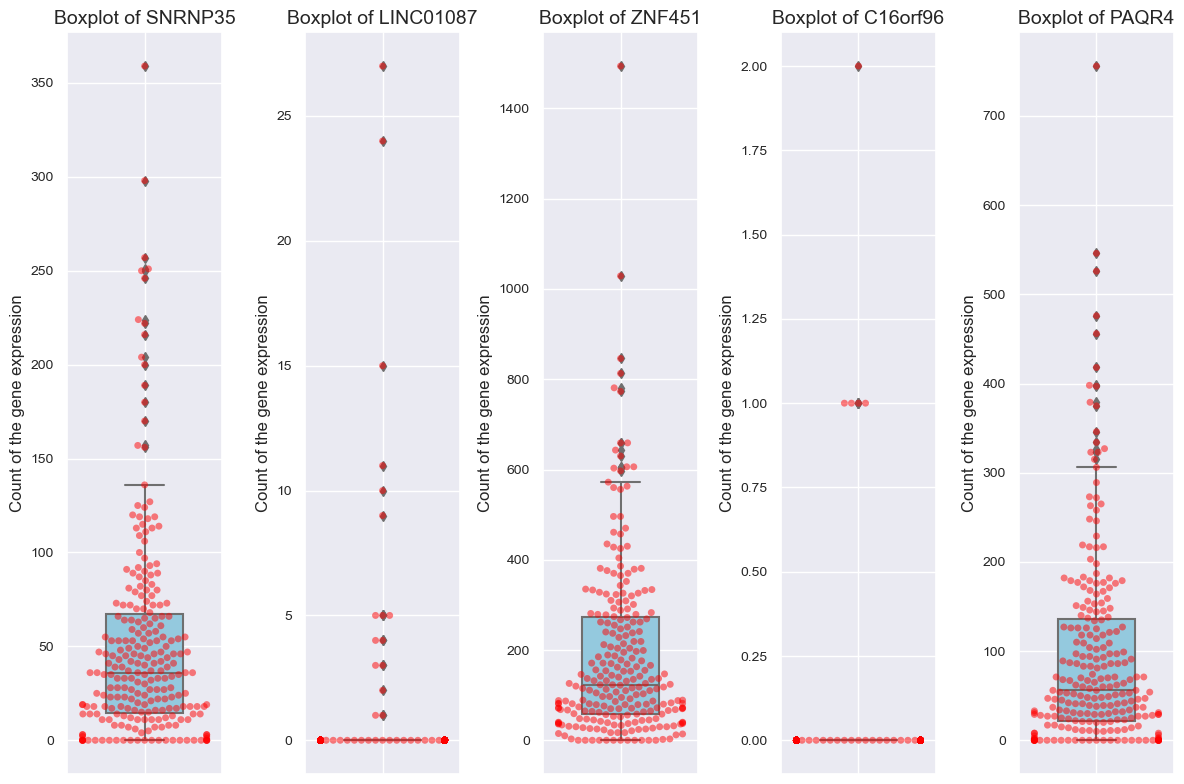

In [19]:
np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 5

# Randomly select column indices
random_columns = np.random.choice(merged.columns[1:], num_boxplots, replace=False)


plt.figure(figsize=(12, 8))  
for i, column in enumerate(random_columns):
    plt.subplot(1, len(random_columns), i+1)
    
    # Customizing boxplot appearance
    sns.boxplot(y=merged[column], color='skyblue', width=0.5)
    
    # Overlaying swarmplot for better visualization of individual data points
    sns.swarmplot(y=merged[column], color='red', alpha=0.5)
    
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel('Count of the gene expression', fontsize=12)
    plt.xlabel('', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)


plt.tight_layout()
plt.show()

In [20]:
# Outliers with Inter-Quartile Range (IQR) proximity rule for each column
Q1 = merged.quantile(0.25)
Q3 = merged.quantile(0.75)
IQR = Q3 - Q1
outliers = (merged < (Q1 - 1.5 * IQR)) | (merged > (Q3 + 1.5 * IQR))
# Print outliers fora each column
print("Number of outliers in the DataFrame:", outliers.sum())
# Print outliers percentage
outliers_percentage = (outliers.sum().sum() / total_elements) * 100
print("{:.2f}%".format(outliers_percentage))

Number of outliers in the DataFrame: WASH7P       6
CICP27      13
DDX11L17    43
WASH9P      34
OR4F29      24
            ..
MT-CYB       9
MT-TT        5
MT-TP        9
MAFIP        9
Target       0
Length: 23397, dtype: int64
6.87%


Another approach: normalize each column independently and find the outliers of the flattened array

In [21]:
# now we normalize each column independently
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_df_normalized = merged[merged.columns[:-1]].copy()
features_df_normalized[features_df_normalized.columns] = scaler.fit_transform(features_df_normalized[features_df_normalized.columns])
features_df_normalized.describe()

KeyboardInterrupt: 

{'whiskers': [<matplotlib.lines.Line2D at 0x2bfe72cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bfe72590>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bbbd1790>],
 'medians': [<matplotlib.lines.Line2D at 0x2c0658810>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c0659bd0>],
 'means': []}

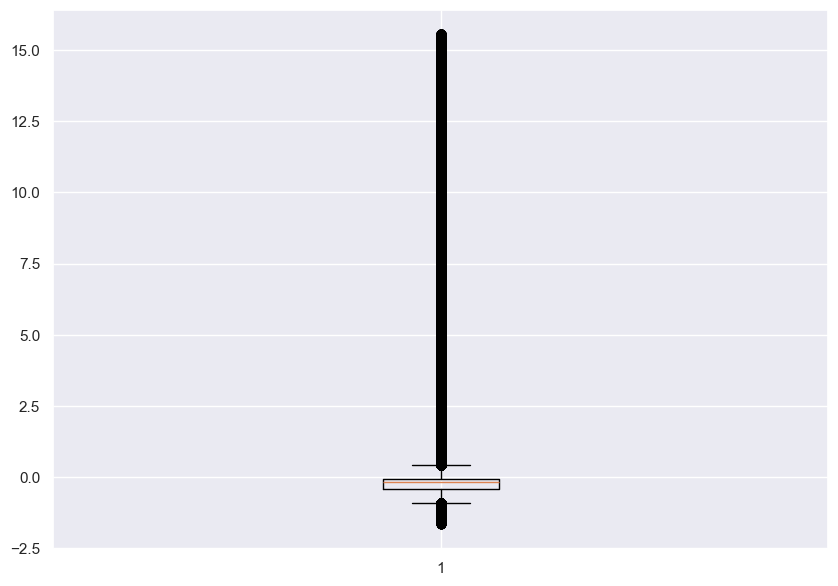

In [ ]:
# convert the dataframe to a numpy array, find outliers
features_array_normalized = np.array(features_df_normalized.T)
# still need to find the outliers
fig = plt.figure(figsize=(10, 7))
plt.boxplot(features_array_normalized.flatten())
# here, we notice that most of the data are outliers